<a href="https://colab.research.google.com/github/bbutka/CEC595/blob/main/L07a_1_Show_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses a deep learning image classification model, VGG16, to show the different filter elements at different levels of the model.

In [ ]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.applications import vgg16
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
import numpy as np 

We'll download the model VGG16 that has already been trained on the dataset ImageNet.

In [ ]:
model = vgg16.VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 5s 0us/step


Read in the image

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1J26HC-TmaiNqD_5xyouXi8sXXDdjIH4B' -O horse.jpg



--2021-02-28 23:29:10--  https://docs.google.com/uc?export=download&id=1J26HC-TmaiNqD_5xyouXi8sXXDdjIH4B
Resolving docs.google.com (docs.google.com)... 74.125.195.139, 74.125.195.113, 74.125.195.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ji97k6h5bgbja551ip1gp1fbjnurdglo/1614554925000/08914542393121785554/*/1J26HC-TmaiNqD_5xyouXi8sXXDdjIH4B?e=download [following]
--2021-02-28 23:29:10--  https://doc-0g-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ji97k6h5bgbja551ip1gp1fbjnurdglo/1614554925000/08914542393121785554/*/1J26HC-TmaiNqD_5xyouXi8sXXDdjIH4B?e=download
Resolving doc-0g-2c-docs.googleusercontent.com (doc-0g-2c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0g-2c-docs.googleusercontent.com (doc-0g-2c-d

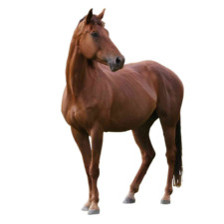

In [ ]:
img = image.load_img("horse.jpg")

display(img)

In [ ]:
# load the image with the required shape
img = image.load_img('horse.jpg', target_size=(224, 224))
# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
yhat = model.predict(img)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

40960/35363 [==================================] - 0s 0us/step
sorrel (90.24%)


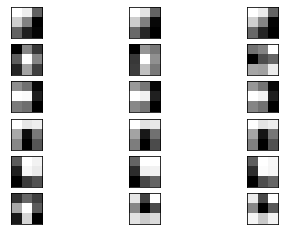

In [ ]:
from matplotlib import pyplot
from numpy import expand_dims
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


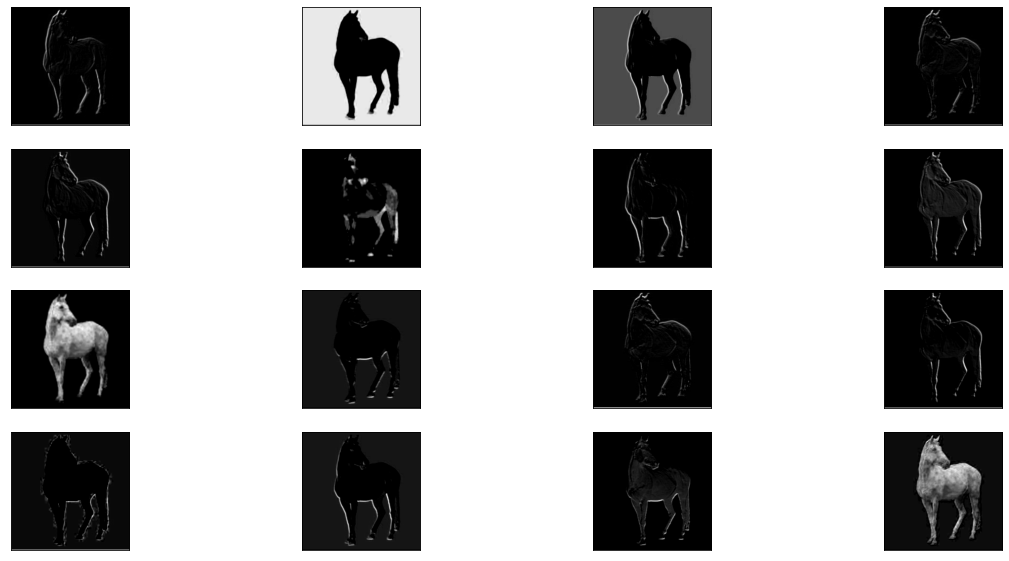

In [ ]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = image.load_img('horse.jpg', target_size=(224, 224))
# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
pyplot.rcParams["figure.figsize"] = (20,10)
# plot all 64 maps in an 8x8 squares
square = 4
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [ ]:
model = vgg16.VGG16(weights='imagenet', include_top=True)


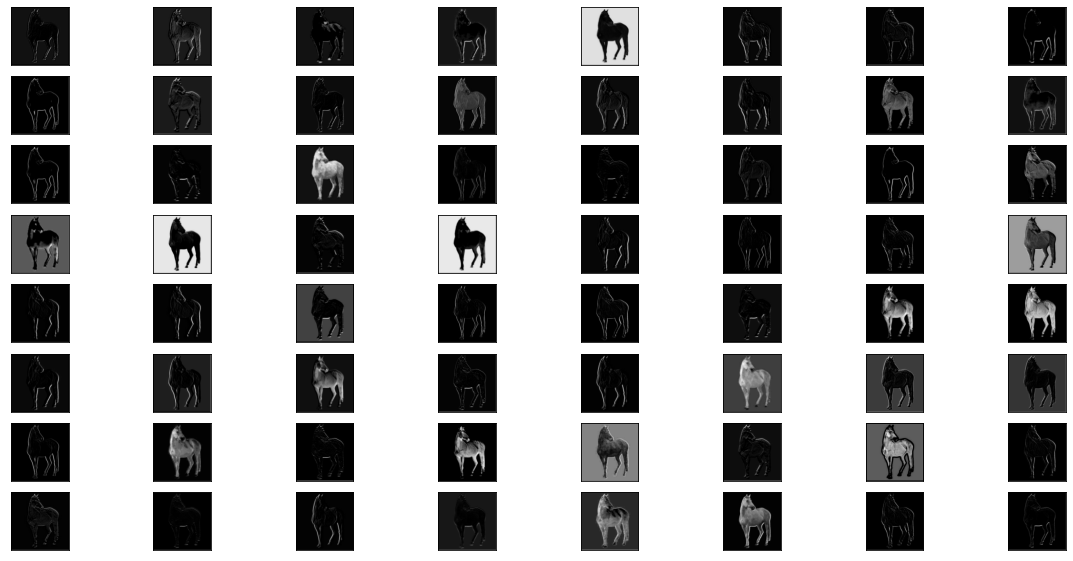

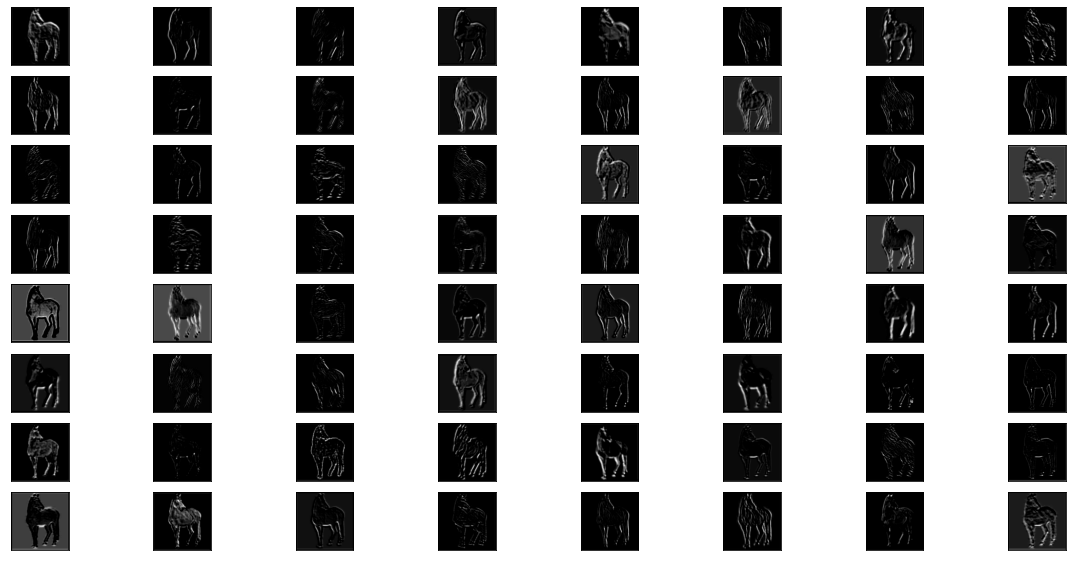

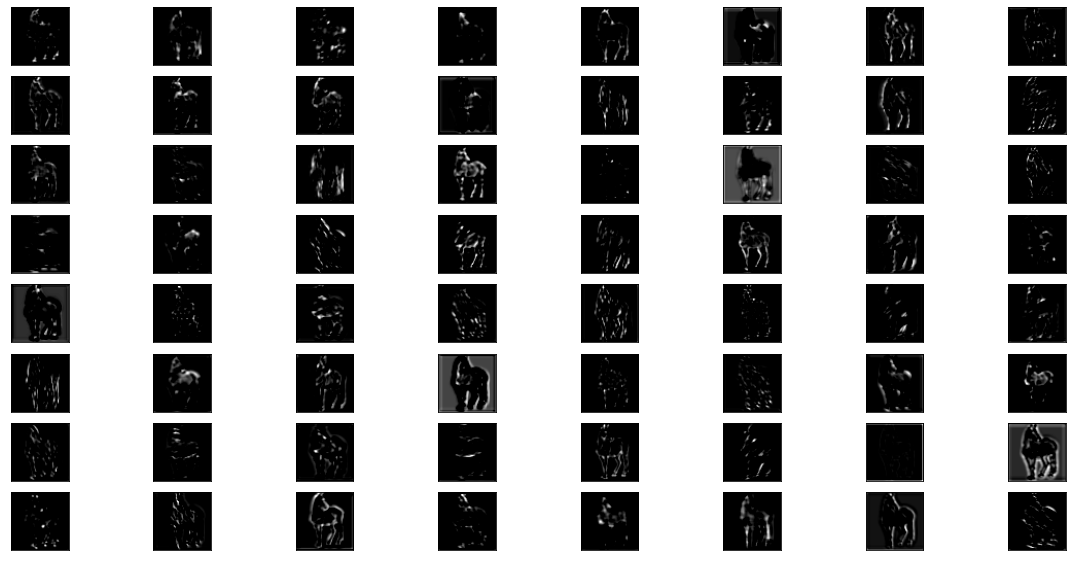

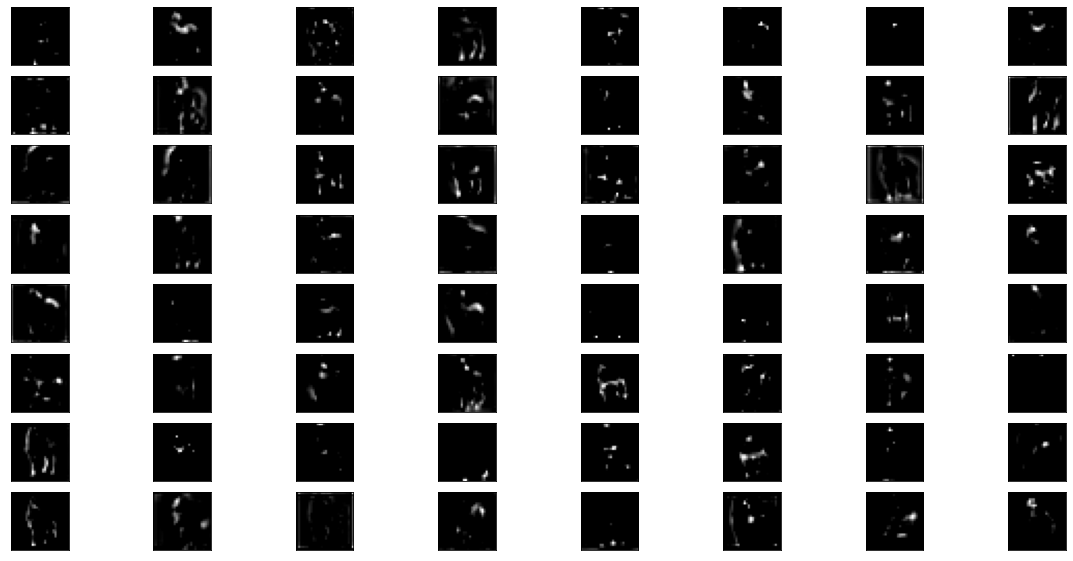

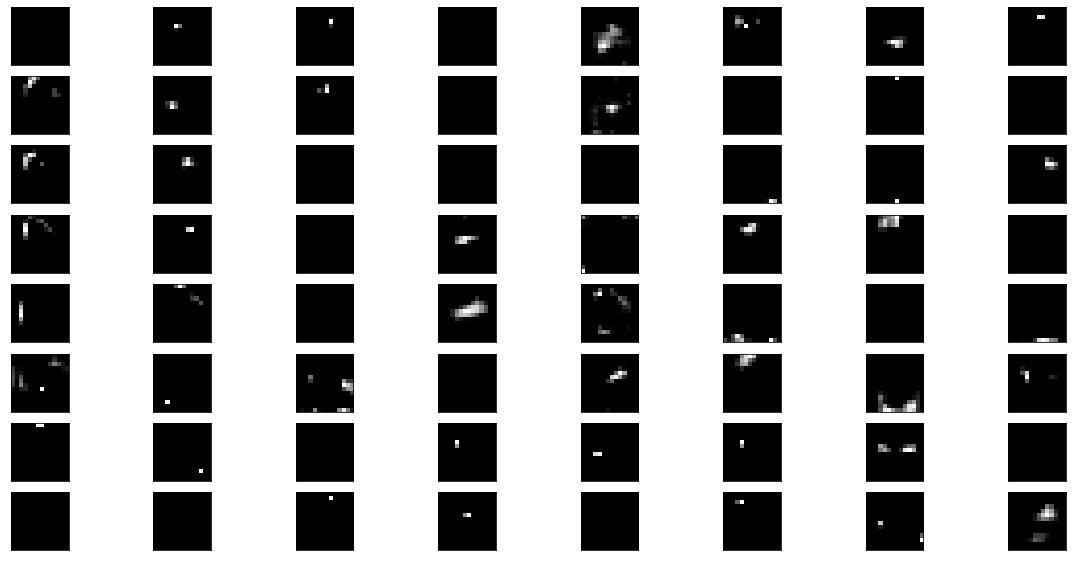

In [ ]:
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
pyplot.rcParams["figure.figsize"] = (20,10)
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()